In [1]:
from ipywidgets import interact, SelectMultiple, FloatSlider
from pandas import DataFrame
from optimisation import property_results
from IPython.display import display
from model_scoring_func import get_all_names
from matplotlib.pyplot import show, xlabel, ylabel, xlim

% matplotlib inline

In [2]:
resp_vars = list(get_all_names())

In [3]:
selection = SelectMultiple(options=resp_vars)

In [4]:
import seaborn as sns
# sns.set(font_scale=1.5)
# sns.set_style('ticks')
# sns.set_style('ticks', {'font.family': 'Cambria'})

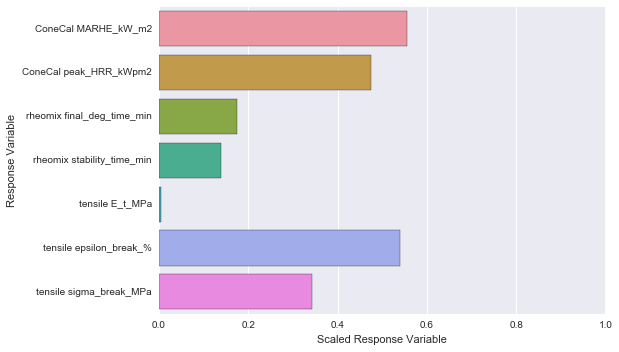

,max,min,value_unscaled
name,,,
ConeCal MARHE_kW_m2,179.16,12.10,104.86
ConeCal peak_HRR_kWpm2,242.76,60.00,146.87
rheomix final_deg_time_min,346.90,12.60,70.70
rheomix stability_time_min,141.40,8.50,26.87
tensile E_t_MPa,1917.68,23.64,33.39
tensile epsilon_break_%,114.77,9.82,66.57
tensile sigma_break_MPa,29.51,10.61,17.08


,phr,Mass Frac. %
PVC,100.0,54.95
filler,0.0,0.00
FR,16.0,8.79
stabiliser,2.0,1.10
DINP,41.0,22.53
LDH,3.0,1.65
spherical_filler,20.0,10.99


In [6]:
ingredients = ['PVC', 'filler', 'FR', 'stabiliser', 'DINP', 'LDH', 'spherical_filler']

ingr_change_phr = ingredients[1:]
mins = [0, 0, 2, 20, 0, 0]
maxs = [70, 20, 10, 70, 15, 20]

w_list = []
for name, my_min, my_max in zip(ingr_change_phr, mins, maxs):
    w_list.append(FloatSlider(min=my_min,
                              max=my_max,
                              step=1.0,
                              description=name,
                              continuous_update=False))

def f(**kwargs):
    phr = [100]
    
    for name in ingr_change_phr:
        phr.append(kwargs[name])
        
    mass_frac = [i/sum(phr) for i in phr]
    mass_frac_per = [round(100*i, 2) for i in mass_frac]
    
    df_form = DataFrame([phr, mass_frac_per], index=['phr', 'Mass Frac. %'], columns=ingredients).T
    
    df_pr = property_results(mass_frac, [], [], use_style=False)
    df_pr = df_pr[['max', 'min', 'value_unscaled']].round(2)
    
    show_these = list(selection.value)
    
    df_pr = df_pr.loc[show_these]
    
    df_pr['value_scaled'] = ((df_pr.value_unscaled - df_pr['min'])/(df_pr['max'] - df_pr['min']))
    df_pr['resp_var'] = df_pr.index
    
    plot = sns.barplot(x='value_scaled', y='resp_var', data=df_pr)
    xlabel('Scaled Response Variable')
    ylabel('Response Variable')
    xlim([0, 1])
    
    show(plot)
    display(df_pr[['max', 'min', 'value_unscaled']], df_form)
    
display(selection)

w_dict = dict(((w.description, w) for w in w_list))
    
interact(f, **w_dict)
                 